# Install dependencies

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
project_id = 'datasci-kalampree'
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list

!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -

!apt -qq update

!apt -qq install gcsfuse

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   103k      0 --:--:-- --:--:-- --:--:--  103k
OK
47 packages can be upgraded. Run 'apt list --upgradable' to see them.
gcsfuse is already the newest version (0.41.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 47 not upgraded.


In [ ]:
!mkdir colab_directory

!gcsfuse --implicit-dirs datasci-kalampree colab_directory

mkdir: cannot create directory ‘colab_directory’: File exists
2022/05/19 21:52:44.294123 Start gcsfuse/0.41.1 (Go version go1.17.6) for app "" using mount point: /content/colab_directory
2022/05/19 21:52:44.325149 Opening GCS connection...
2022/05/19 21:52:44.962827 Mounting file system "datasci-kalampree"...
2022/05/19 21:52:44.964289 File system has been successfully mounted.


In [ ]:
!ls colab_directory

mock  radarNJ  radarNK	temp  train_radarNJ


# Import lib

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from PIL import Image
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Testing on Save filename to .txt

In [ ]:
image_names = sorted(os.listdir('/content/colab_directory/train_radarNJ/bkk_radar_images_all'))
image_names = [str(e) for e in image_names]

In [ ]:
image_names = np.array(image_names)

In [ ]:
image_names

array(['1592461954.png', '1592462136.png', '1592462768.png', ...,
       '1624913244.png', '1624915046.png', '1624915346.png'], dtype='<U14')

In [ ]:
all_imgs = len(image_names)
train_imgs = int(all_imgs * 0.7)
val_imgs = all_imgs - train_imgs
print(all_imgs)
print(train_imgs)
print(val_imgs)

86083
60258
25825


In [ ]:
train = image_names[:train_imgs]
val = image_names[train_imgs:]

In [ ]:
train.tofile('train_image_names.csv', sep = ',') 
val.tofile('val_image_names.csv', sep = ',') 

In [ ]:
image_names.tofile('image_names.csv', sep = ',') 

In [ ]:
img = Image.open(f'/content/colab_directory/train_radarNJ/bkk_radar_images_all/{image_names[0]}')

In [ ]:
img_rgb = img.convert('RGB')

In [ ]:
img_rgb_array = np.array(img_rgb)

In [ ]:
img_rgb_array[0]

array([[165, 151,  95],
       [165, 151,  95],
       [165, 151,  95],
       ...,
       [165, 151,  95],
       [165, 151,  95],
       [165, 151,  95]], dtype=uint8)

In [ ]:
img_array = np.array(img)

In [ ]:
img_array.shape

(2034, 2048, 4)

In [ ]:
img_array

array([[[165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        ...,
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0]],

       [[165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        ...,
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0]],

       [[165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        ...,
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0]],

       ...,

       [[165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        ...,
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0]],

       [[165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        ...,
        [165, 151,  95,   0],
        [165, 151,  95,   0],
        [165, 151,  95,   0]],

       [[165

In [ ]:
tmp = cv2.imread(f'/content/colab_directory/train_radarNJ/bkk_radar_images_all/{image_names[0]}')

In [ ]:
tmp.shape

(2034, 2048, 3)

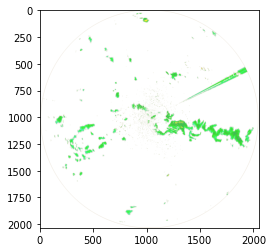

In [ ]:
plt.imshow(img_array)

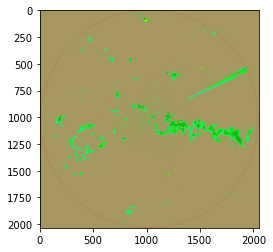

In [ ]:
plt.imshow(img_rgb)
plt.show()

# sample dataset

In [ ]:
NUM = 1000
sample_train = image_names[:1000]
sample_val = image_names[1000:1300]

In [ ]:
sample_train.tofile('sample_train_image_names.csv', sep = ',') 
sample_val.tofile('sample_val_image_names.csv', sep = ',') 

In [ ]:
sample_test = image_names[1300:1600]
sample_test.tofile('sample_test_image_names.csv', sep = ',') 

# Train Test split /2

In [ ]:
#file1,2,3

In [ ]:
file_nums_12345 = 4864*5
val_nums_6 = 4864

In [ ]:
file_nums_12345

24320

In [ ]:
train2 = image_names[:file_nums_12345]
val2= image_names[file_nums_12345:file_nums_12345+val_nums_6 ]

In [ ]:
len(val2)

4864

In [ ]:
train2.tofile('train2_image_names.csv', sep = ',') 
val2.tofile('val2_image_names.csv', sep = ',') 

In [ ]:
file_nums_123 = 4864*4
val_nums_4 = 4864

In [ ]:
rainnet_train = image_names[:file_nums_123]
rainnet_val = image_names[file_nums_123:file_nums_123+val_nums_4]

In [ ]:
rainnet_train.tofile('rainnet_train_image_names.csv', sep = ',') 
rainnet_val.tofile('rainnet_val_image_names.csv', sep = ',') 

In [ ]:
train3 = image_names[4864*3:4864*4]
val3 = image_names[4864*4:(4864*4+4864//2)]

In [ ]:
len(train3)

4864

In [ ]:
len(val3)

2432

In [ ]:
train3.tofile('train3_image_names.csv', sep = ',') 
val3.tofile('val3_image_names.csv', sep = ',') 